# 2 Sum (Array)

Given a sum and an array, find two pairs that add up to the given sum.

For example, if the array is [3, 5, 2, -4, 8, 11] and the sum is 7, your program should return [[11, -4], [2, 5]] because 11 + -4 = 7 and 2 + 5 = 7.

In [1]:
def naiveSolution(ar,sm):
    out = []
    for number1 in ar:
        temp = [x for x in ar if x!=number1]
        for number2 in temp:
            if number1 + number2 == sm:
                if {number1,number2} not in out:
                    out.append({number1,number2})
                    
    return out

naiveSolution([3, 5, 2, -4, 8, 11] ,7)

[{2, 5}, {-4, 11}]

In [2]:
def dpSolution(ar,sm):
    tried = {}
    out = []
    for number in ar:
        if sm - number not in tried:
            tried[number] = number
        else:
            number2 = sm - number
            if {number,number2} not in out:
                    out.append({number,number2})
    return out
            
dpSolution([3, 5, 2, -4, 8, 11] ,7)

[{2, 5}, {-4, 11}]

# Longest Increasing Subarray (Dynamic Programming)

Topics: “sliding window”, dynamic programming, time/space complexity
    
Given an array containing n numbers. The problem is to find the length of the longest contiguous subarray such that every element in the subarray is strictly greater than its previous element in the same subarray.

Examples:

Input : arr[] = {5, 6, 3, 5, 7, 8, 9, 1, 2}
Output : 5
The subarray is {3, 5, 7, 8, 9}

Input : arr[] = {12, 13, 1, 5, 4, 7, 8, 10, 10, 11}
Output : 4
The subarray is {4, 7, 8, 10}

In [66]:
def dpSolution(ar):  
    n = len(ar)
    
    overall_max = 1 
    current_max = 1 
       
    for i in range(1, n) : 

        if (arr[i] > arr[i-1]) : 
            current_max =current_max + 1 
        else : 
            if (overall_max < current_max): 
                overall_max = current_max  
  
            current_max = 1   
          
    if (overall_max < current_max) : 
        overall_max = current_max 
       
    return overall_max 

  
arr = [5, 6, 3, 5, 7, 8, 9, 1, 2] 
n = len(arr) 
print("Length = ", dpSolution(arr)) 

Length =  5


# Climbing Stairs (Dynamic Programming)

You are climbing a stair case. It takes n steps to reach to the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

In [33]:
def climbingStairs(n):
    if n == 0:
        return 1
    elif n < 0:
        return 0
    return climbingStairs(n-1) + climbingStairs(n-2)

s = 5
print("Number of ways =",climbingStairs(s) )

Number of ways = 8


In [34]:
def climbingStairs(n):
    cache = [-1] * (n+1)
    cache[0] = 1
    cache[1] = 1
    for i in range(2, n+1):
        cache[i] = cache[i - 1] + cache[i - 2]
    return cache[n]

s = 5
print("Number of ways =",climbingStairs(s) )

Number of ways = 8


In [35]:
def climbingStairs(s): 
    
    def helper(n): 
        res = [0 for x in range(n)]
        res[0],res[1] = 1,1

        for i in range(2,n): 
            res[i] = res[i-1] + res[i-2]
        return res[n-1] 
    
    return helper(s+1) 
      
s = 5
print("Number of ways =",climbingStairs(s) )

Number of ways = 8


# Coin Change (Dynamic Programming)
Given a value N, if we want to make change for N cents, and we have infinite supply of each of S = { S1, S2, .. , Sm} valued coins, how many ways can we make the change? The order of coins doesn’t matter.

For example, for N = 4 and S = {1,2,3}, there are four solutions: {1,1,1,1},{1,1,2},{2,2},{1,3}. So output should be 4. For N = 10 and S = {2, 5, 3, 6}, there are five solutions: {2,2,2,2,2}, {2,2,3,3}, {2,2,6}, {2,3,5} and {5,5}. So the output should be 5.

In [43]:
def coinChange(n,s):
    cache = [0] * (n+1)
    cache[0] = 1
    for j in s:
        for i in range(j, n+1): 
            cache[i] = cache[i] + cache[i - j]
    return cache[n]

x = coinChange(4,[1,2,3])
print(x)

x = coinChange(10,[2, 5, 3, 6])
print(x)

4
5


In [45]:
def coinChange(S, m, n): 
    table = [0 for k in range(n+1)] 
    table[0] = 1
  
    for i in range(0,m): 
        for j in range(S[i],n+1): 
            table[j] += table[j-S[i]] 
  
    return table[n] 
  

arr = [1, 2, 3] 
m = len(arr) 
n = 4
x = coinChange(arr, m, n) 
print(x) 

arr = [2, 5, 3, 6] 
m = len(arr) 
n = 10
x = coinChange(arr, m, n) 
print(x)

4
5


# Clone Graph (Graph)

Clone an undirected graph. Each node in the graph contains a label and a list of its neighbors.

In [51]:
class UndirectedGraphNode(object):
    def __init__(self, x,n=[]):
        self.label = x
        self.neighbors = n

# BFS
class Solution(object):
    # @param node, a undirected graph node
    # @return a undirected graph node
    def cloneGraph(self, node):
        if node is None:
            return None
        cloned_node = UndirectedGraphNode(node.label)
        cloned, queue = {node:cloned_node}, [node]

        while queue:
            current = queue.pop()
            for neighbor in current.neighbors:
                if neighbor not in cloned:
                    queue.append(neighbor)
                    cloned_neighbor = UndirectedGraphNode(neighbor.label)
                    cloned[neighbor] = cloned_neighbor
                cloned[current].neighbors.append(cloned[neighbor])
        return cloned[node]

node1 = UndirectedGraphNode(1)
node2 = UndirectedGraphNode(2)
node3 = UndirectedGraphNode(3,[node2])
node1.neighbors = [node2]
node2.neighbors = [node1,node3]

sol = Solution()
for item in sol.cloneGraph(node1).neighbors:
    print(item.label)

2
1
3
2


# Course Schedule (Graph)


There are a total of n courses you have to take, labeled from 0 to n-1.

Some courses may have prerequisites, for example to take course 0 you have to first take course 1, which is expressed as a pair: [0,1]

Given the total number of courses and a list of prerequisite pairs, is it possible for you to finish all courses?

Example 1:

Input: 2, [[1,0]] 
<br>Output: true
<br>Explanation: There are a total of 2 courses to take. 
             To take course 1 you should have finished course 0. So it is possible.

Example 2:

Input: 2, [[1,0],[0,1]]
<br>Output: false
<br>Explanation: There are a total of 2 courses to take. 
             To take course 1 you should have finished course 0, and to take course 0 you should
             also have finished course 1. So it is impossible.

In [60]:
def canFinish(numCourses, prerequisites):
    graph = [[] for _ in range(numCourses)]
    visit = [0 for _ in range(numCourses)]
    for x, y in prerequisites:
        graph[x].append(y)
    def dfs(i):
        if visit[i] == -1:
            return False
        if visit[i] == 1:
            return True
        visit[i] = -1
        for j in graph[i]:
            if not dfs(j):
                return False
        visit[i] = 1
        return True
    for i in range(numCourses):
        if not dfs(i):
            return False
    return True

print(canFinish(2,[[1,0]]))

print(canFinish(2,[[1,0],[0,1]]))

True
False


# Connected Components in an undirected graph (Graph)

Given an undirected graph, print all connected components line by line. For example consider the following graph.

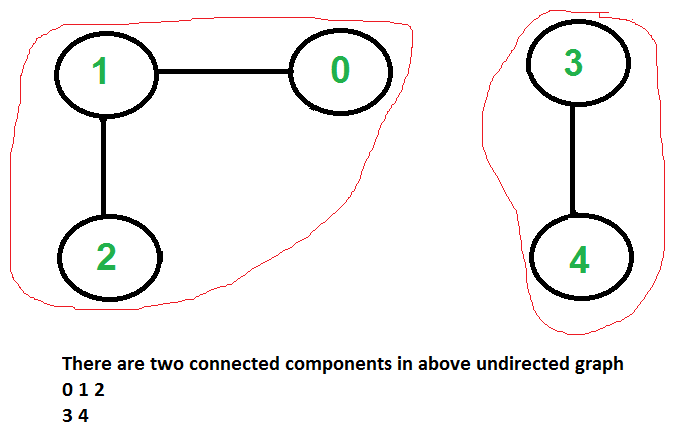

In [61]:
class Graph: 
      
    # init function to declare class variables 
    def __init__(self,V): 
        self.V = V 
        self.adj = [[] for i in range(V)] 
        
    # method to add an undirected edge 
    def addEdge(self, v, w): 
        self.adj[v].append(w) 
        self.adj[w].append(v) 
        
    def dfs(self, temp, v, visited): 
  
        # Mark the current vertex as visited 
        visited[v] = True
  
        # Store the vertex to list 
        temp.append(v) 
  
        # Repeat for all vertices adjacent 
        # to this vertex v 
        for i in self.adj[v]: 
            if visited[i] == False: 
                  
                # Update the list 
                temp = self.dfs(temp, i, visited) 
        return temp 
    
    # Method to retrieve connected components 
    # in an undirected graph 
    def connectedComponents(self): 
        visited = [] 
        cc = [] 
        for i in range(self.V): 
            visited.append(False) 
        for v in range(self.V): 
            if visited[v] == False: 
                temp = [] 
                cc.append(self.dfs(temp, v, visited)) 
        return cc 

# Create a graph given in the above diagram 
# 5 vertices numbered from 0 to 4 
g = Graph(5); 
g.addEdge(1, 0) 
g.addEdge(2, 3) 
g.addEdge(3, 4) 
g.connectedComponents()

[[0, 1], [2, 3, 4]]

# Check if a given graph is tree or not

Write a function that returns true if a given undirected graph is tree and false otherwise. For example, the following graph is a tree.

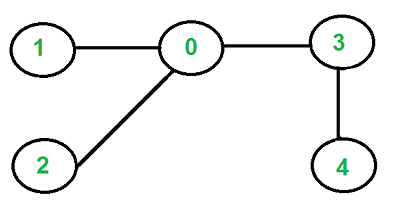

But the following graph is not a tree.

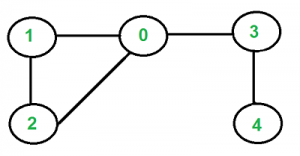

An undirected graph is tree if it has following properties.
1) There is no cycle.
2) The graph is connected.

For an undirected graph we can either use BFS or DFS to detect above two properties.

In [63]:
# Python Program to check whether  
# a graph is tree or not 
  
from collections import defaultdict 
  
class Graph(): 
  
    def __init__(self, V): 
        self.V = V 
        self.graph  = defaultdict(list) 
  
    def addEdge(self, v, w): 
        # Add w to v ist. 
        self.graph[v].append(w)  
        # Add v to w list. 
        self.graph[w].append(v)  
  
    # A recursive function that uses visited[]  
    # and parent to detect cycle in subgraph  
    # reachable from vertex v. 
    def isCyclicUtil(self, v, visited, parent): 
  
        # Mark current node as visited 
        visited[v] = True
  
        # Recur for all the vertices adjacent  
        # for this vertex 
        for i in self.graph[v]: 
            # If an adjacent is not visited,  
            # then recur for that adjacent 
            if visited[i] == False: 
                if self.isCyclicUtil(i, visited, v) == True: 
                    return True
  
            # If an adjacent is visited and not  
            # parent of current vertex, then there  
            # is a cycle. 
            elif i != parent: 
                return True
  
        return False
  
    # Returns true if the graph is a tree,  
    # else false. 
    def isTree(self): 
        # Mark all the vertices as not visited  
        # and not part of recursion stack 
        visited = [False] * self.V 
  
        # The call to isCyclicUtil serves multiple  
        # purposes. It returns true if graph reachable  
        # from vertex 0 is cyclcic. It also marks  
        # all vertices reachable from 0. 
        if self.isCyclicUtil(0, visited, -1) == True: 
            return False
  
        # If we find a vertex which is not reachable 
        # from 0 (not marked by isCyclicUtil(),  
        # then we return false 
        for i in range(self.V): 
            if visited[i] == False: 
                return False
  
        return True
  
# Driver program to test above functions 
g1 = Graph(5) 
g1.addEdge(1, 0) 
g1.addEdge(0, 2) 
g1.addEdge(0, 3) 
g1.addEdge(3, 4) 
print("Graph is a Tree" if g1.isTree() == True else "Graph is a not a Tree")
  
g2 = Graph(5) 
g2.addEdge(1, 0) 
g2.addEdge(0, 2) 
g2.addEdge(2, 1) 
g2.addEdge(0, 3) 
g2.addEdge(3, 4) 
print("Graph is a Tree" if g2.isTree() == True else "Graph is a not a Tree")

Graph is a Tree
Graph is a not a Tree


# Meeting Rooms (Interval)
 
Given an array of meeting time intervals consisting of start and end times [s1, e1], [s2, e2], ... , determine if a person could attend all meetings.

For example,
Given [ [0, 30], [5, 10], [15, 20] ],
return false.

In [67]:
# Definition for an interval.
class Interval(object):
    def __init__(self, s=0, e=0):
        self.start = s
        self.end = e

class Solution(object):
    def canAttendMeetings(self, intervals):
        """
        :type intervals: List[Interval]
        :rtype: bool
        """
        intervals.sort(key=lambda itv: (itv.start, itv.end))
        for i in range(1, len(intervals)):
            if intervals[i].start < intervals[i - 1].end:
                return False

        return True
    
ar = [ [0, 30], [5, 10], [15, 20] ]
def listOfInterval(intervals):
    out = []
    for start,end in intervals:
        out.append(Interval(start,end))
    return out

sol = Solution()
sol.canAttendMeetings(listOfInterval(ar))

False

# Reverse a linked list (Linked List)

Given pointer to the head node of a linked list, the task is to reverse the linked list. We need to reverse the list by changing links between nodes.

Examples:

Input: Head of following linked list
<br>1->2->3->4->NULL
<br>Output: Linked list should be changed to,
<br>4->3->2->1->NULL

In [70]:
# Node class  
class Node(object): 

    # Constructor to initialize the node object 
    def __init__(self, data): 
        self.data = data 
        self.next = None
  
class LinkedList(object): 
  
    # Function to initialize head 
    def __init__(self): 
        self.head = None
  
    # Function to reverse the linked list 
    def reverse(self): 
        prev = None
        current = self.head 
        while(current is not None): 
            next = current.next
            current.next = prev 
            prev = current 
            current = next
        self.head = prev 
          
    # Function to insert a new node at the beginning 
    def push(self, new_data): 
        new_node = Node(new_data) 
        new_node.next = self.head 
        self.head = new_node 
  
    # Utility function to print the linked LinkedList 
    def printList(self): 
        temp = self.head 
        while(temp): 
            print(temp.data )
            temp = temp.next
  
  
# Driver program to test above functions 
llist = LinkedList() 
llist.push(20) 
llist.push(4) 
llist.push(15) 
llist.push(85) 
  
print("Given Linked List")
llist.printList() 
llist.reverse() 
print("Reversed Linked List")
llist.printList()

Given Linked List
85
15
4
20
Reversed Linked List
20
4
15
85


# Length of the longest substring without repeating characters

Given a string str, find the length of the longest substring without repeating characters.

For “ABDEFGABEF”, the longest substring are “BDEFGA” and “DEFGAB”, with length 6.
<br>For “BBBB” the longest substring is “B”, with length 1.
<br>For “GEEKSFORGEEKS”, there are two longest substrings shown in the below diagrams, with length 7

In [80]:
def longestSubstring(string):
    overall_max = 0
    current_max = 0
    word = ""
    
    for letter in string:
        if letter in word:
            current_max = 0
            word = ""
        if letter not in word:
            current_max += 1
            word += letter
        if current_max > overall_max:
            overall_max = current_max
            
    if current_max > overall_max:
        overall_max = current_max
        
    return overall_max
        
print(longestSubstring("ABDEFGABEF"))
print(longestSubstring("BBBB"))
print(longestSubstring("GEEKSFORGEEKS"))

6
1
7


# Merge k Sorted Lists

Merge k sorted linked lists and return it as one sorted list. Analyze and describe its complexity.

Example:

Input:
[
<br>  1->4->5,
<br>  1->3->4,
<br>  2->6
<br>]
<br>Output: 1->1->2->3->4->4->5->6

In [ ]:
def mergeSortedLists(ar):
    for 
    
ar = [[1,4,5],[1,3,5],[2,6]]

# House Robber (Dynamic Programming)

Find maximum possible stolen value from houses


There are n houses build in a line, each of which contains some value in it. A thief is going to steal the maximal value of these houses, but he can’t steal in two adjacent houses because owner of the stolen houses will tell his two neighbour left and right side. What is the maximum stolen value.

Examples:

Input  : hval[] = {6, 7, 1, 3, 8, 2, 4}
<br>Output : 19
<br>Thief will steal 6, 1, 8 and 4 from house.

<br>Input  : hval[] = {5, 3, 4, 11, 2}
<br>Output : 16
<br>Thief will steal 5 and 11

In [81]:
# not using cache
def maximize_loot(hval, n): 
    if n == 0: 
        return 0
    if n == 1: 
        return hval[0] 
    if n == 2: 
        return max(hval[0], hval[1]) 
  
    # dp[i] represent the maximum value stolen so 
    # for after reaching house i. 
    dp = [0]*n 
  
    # Initialize the dp[0] and dp[1] 
    dp[0] = hval[0] 
    dp[1] = max(hval[0], hval[1]) 
      
    # Fill remaining positions 
    for i in range(2, n): 
        dp[i] = max(hval[i]+dp[i-2], dp[i-1]) 
  
    return dp[-1] 

# using cache
def maximize_loot(hval, n): 
    if n == 0: 
        return 0
  
    value1 = hval[0] 
    if n == 1: 
        return value1 
  
    value2 = max(hval[0], hval[1]) 
    if n == 2: 
        return value2 
  
    # contains maximum stolen value at the end 
    max_val = None
  
    # Fill remaining positions 
    for i in range(2, n): 
        max_val = max(hval[i]+value1, value2) 
        value1 = value2 
        value2 = max_val 
  
    return max_val 

# Value of houses 
hval = [6, 7, 1, 3, 8, 2, 4] 

# number of houses 
n = len(hval) 
print("Maximum loot value : {}".format(maximize_loot(hval, n))) 

Maximum loot value : 19


dp[i] = max (hval[i] + dp[i-2], dp[i-1])

hval[i] + dp[i-2] is the case when thief
decided to rob house i. In that situation 
maximum value will be the current value of
house + maximum value stolen till last 
robbery at house not adjacent to house 
i which will be house i-2.  
 
dp[i-1] is the case when thief decided not 
to rob house i. So he will check adjacent 
house for maximum value stolen till now. 

# Jump Game

Given an array of non-negative integers, you are initially positioned at the first index of the array.

Each element in the array represents your maximum jump length at that position.

Determine if you are able to reach the last index.

Example 1:

Input: [2,3,1,1,4]
<br>Output: true
<br>Explanation: Jump 1 step from index 0 to 1, then 3 steps to the last index.
<br>Example 2:

Input: [3,2,1,0,4]

In [86]:
def canJump(A):
    reachable = 0
    for i, length in enumerate(A):
        if i > reachable:
            break
        reachable = max(reachable, i + length)
    return reachable >= len(A) - 1
    
print(canJump([2,3,1,1,4]))
print(canJump([3,2,1,0,4]))

True
False


# Knight Dial

Imagine you place a knight chess piece on a phone dial pad. This chess piece moves in an uppercase “L” shape: two steps horizontally followed by one vertically, or one step horizontally then two vertically:

Pay no attention to the poorly-redacted star and pound keys
Suppose you dial keys on the keypad using only hops a knight can make. Every time the knight lands on a key, we dial that key and make another hop. The starting position counts as being dialed.
How many distinct numbers can you dial in N hops from a particular starting position?

In [89]:
NEIGHBORS_MAP = {
    1: (6, 8),
    2: (7, 9),
    3: (4, 8),
    4: (3, 9, 0),
    5: tuple(),  # 5 has no neighbors
    6: (1, 7, 0),
    7: (2, 6),
    8: (1, 3),
    9: (2, 4),
    0: (4, 6),
}

def neighbors(position):
    return NEIGHBORS_MAP[position]

def count_sequences(start_position, num_hops):                  
    if num_hops == 0:                                           
        return 1                                                
                                                                
    num_sequences = 0                                           
    for position in neighbors(start_position):                  
        num_sequences += count_sequences(position, num_hops - 1)
    return num_sequences                                        
                                                                
print(count_sequences(6, 2))

def count_sequences(start_position, num_hops):
    cache = {}

    def helper(position, num_hops):
        if (position, num_hops) in cache:
            return cache[ (position, num_hops) ]

        if num_hops == 0:
            return 1

        else:
            num_sequences = 0
            for neighbor in neighbors(position):
                num_sequences += helper(neighbor, num_hops - 1)
            cache[ (position, num_hops) ] = num_sequences
            return num_sequences

    res = helper(start_position, num_hops)
    return res

print(count_sequences(6, 2))


def count_sequences(start_position, num_hops):                
    prior_case = [1] * 10                                     
    current_case = [0] * 10                                   
    current_num_hops = 1                                      
                                                              
    while current_num_hops <= num_hops:                       
        current_case = [0] * 10                               
        current_num_hops += 1                                 
                                                              
        for position in range(0, 10):                         
            for neighbor in neighbors(position):              
                current_case[position] += prior_case[neighbor]
        prior_case = current_case                             
                                                              
    return current_case[start_position]  

print(count_sequences(6, 2))

6
6
6


# Find minimum number of coins that make a given value
Given a value V, if we want to make change for V cents, and we have infinite supply of each of C = { C1, C2, .. , Cm} valued coins, what is the minimum number of coins to make the change?

Examples:

Input: coins[] = {25, 10, 5}, V = 30
<br>Output: Minimum 2 coins required
<br>We can use one coin of 25 cents and one of 5 cents 

Input: coins[] = {9, 6, 5, 1}, V = 11
<br>Output: Minimum 2 coins required
<br>We can use one coin of 6 cents and 1 coin of 5 cents

In [5]:
def dpMakeChange(coinValueList,change):
    minCoins = [0]*(amnt+1)
    coinsUsed = [0]*(amnt+1)
    for cents in range(change+1):
        coinCount = cents
        newCoin = 1
        for j in [c for c in coinValueList if c <= cents]:
            if minCoins[cents-j] + 1 < coinCount:
                coinCount = minCoins[cents-j]+1
                newCoin = j
        minCoins[cents] = coinCount
        coinsUsed[cents] = newCoin
    return minCoins[change]

amnt = 63
clist = [1,5,10,21,25]

dpMakeChange(clist,amnt)

3